In [4]:
from functools import partial
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot

from karpathy_series.makemore.bigrams import BiGram
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet
from karpathy_series.makemore.components.networks.frequentist import Frequentist
from karpathy_series.makemore.components.models.model import FreqModel
from karpathy_series.makemore.components.generation import BiGramNetGenerator
from karpathy_series.makemore.components.function.loss import CrossEntropyExpLoss
from karpathy_series.makemore.training.data import TrainingSequencer
from karpathy_series.makemore.training.learning import FreqLearner

%matplotlib inline

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_gram_gen = partial(BiGram.generate, char_set.pad)
ts_bi = TrainingSequencer(char_encoder, char_encoder, bi_gram_gen)

In [5]:
freq = Frequentist.as_cleared(char_encoder.size)
freq_model = FreqModel(freq, CrossEntropyExpLoss())
generator = BiGramNetGenerator(char_set, char_encoder, freq)

In [6]:
training_sequence = ts_bi.training_sequence(words, 32, True)
xis_v, yis_v = ts_bi.training_set(words)

In [7]:
freq_learner = FreqLearner(freq_model)
losses = freq_learner(training_sequence)

In [8]:
freq_model(xis_v, yis_v)

tensor(2.4540)

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

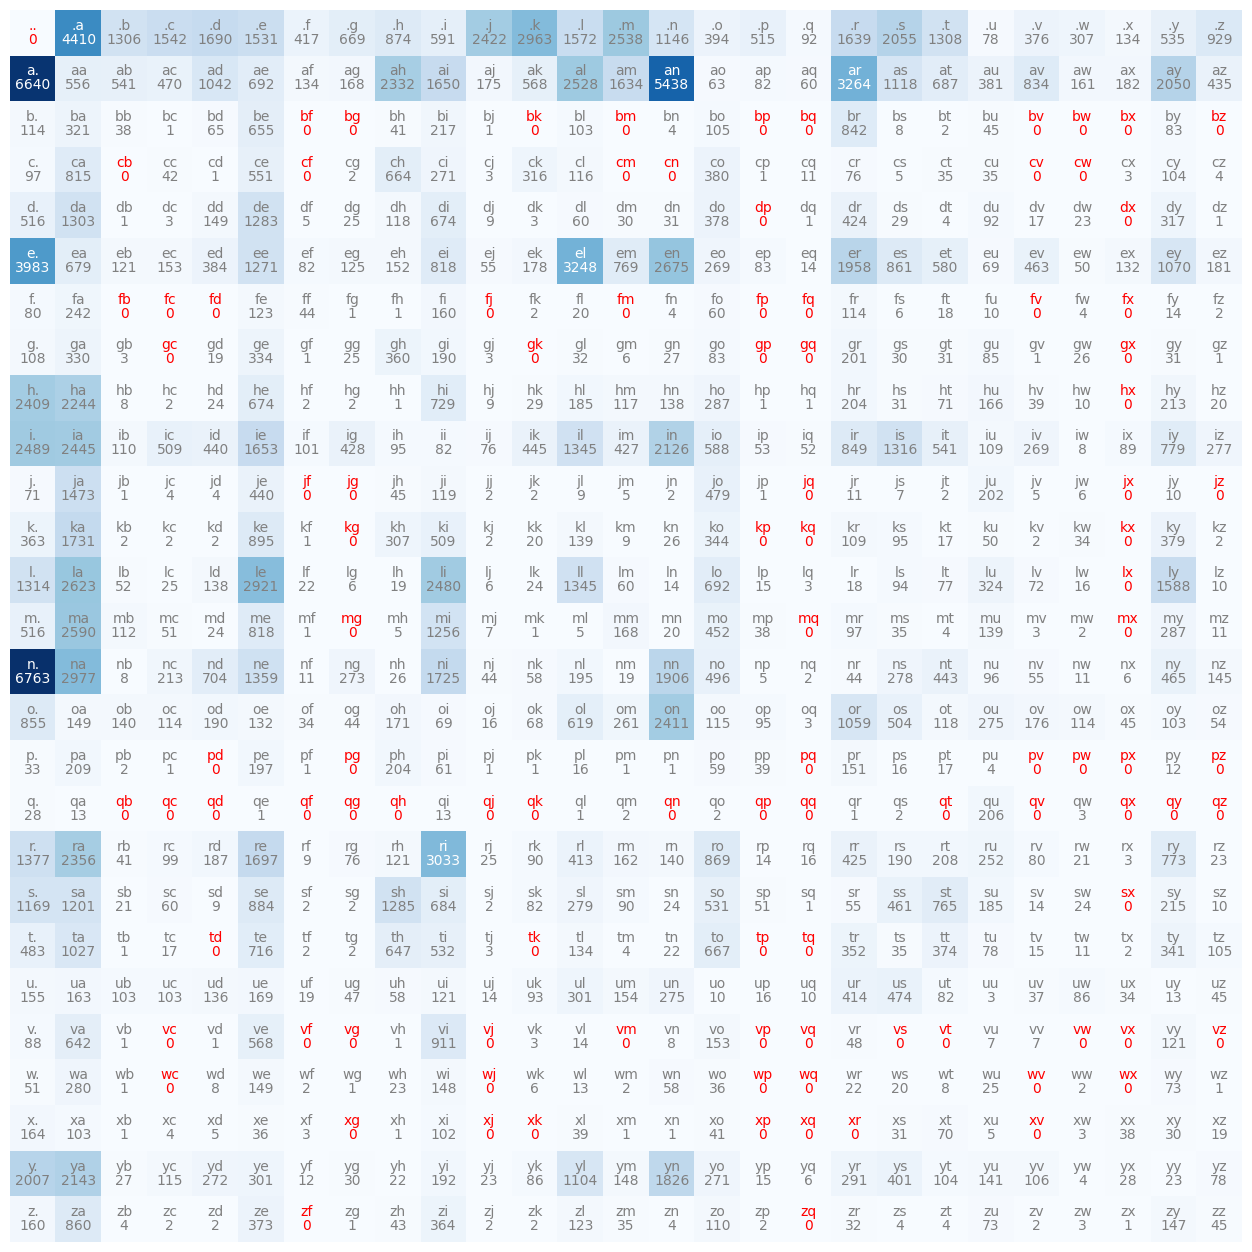

In [9]:
plt.figure(figsize=(16, 16))
plt.imshow(freq.counts, cmap="Blues")
for i, j, count in freq.items():
    code = char_encoder.decode(i) + char_encoder.decode(j)
    color = "red" if count == 0 else ("white" if count > 3000 else "gray")
    plt.text(j, i, code, ha="center", va="bottom", color=color)
    plt.text(j, i, count, ha="center", va="top", color=color)
plt.axis("off")

In [15]:
generator()

'kelitice'

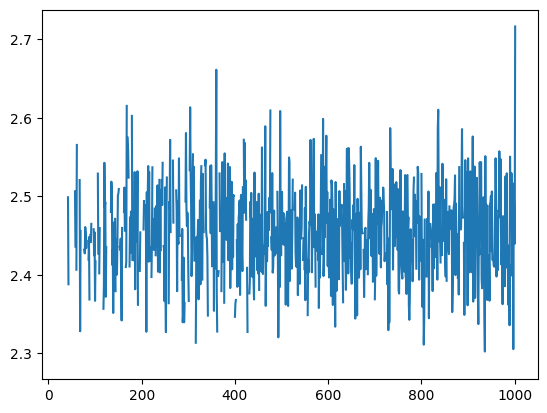

In [16]:
plot(losses)